## direction field fixer for LLE events 
in cases where I bungled it initially using [100] instead of [i] in loop

In [37]:
import xarray as xr
import glob 
import numpy as np 

# import pyproj
# geodesic = pyproj.Geod(ellps='WGS84')

In [7]:
!ls ../../Library/CloudStorage/Box-Box/VaporLakes/data/LAKEBYLAKE/direction_field_wrong_fixable/

2017_05_28_11_lat5p291S.M2_all2Dfields.nc
2017_05_28_11_lat5p291S.M2_all2Dfields_myfirst.nc
2017_12_01_11_lat9p845S.M2_all2Dfields.nc
2018_03_19_12_lat9p318S.M2_all2Dfields.nc
2018_10_22_15_lat9p781N.M2_all2Dfields.nc
2018_11_16_21_lat8p412S.M2_all2Dfields.nc
2018_11_20_11_lat4p616S.M2_all2Dfields.nc


In [49]:
path = '../../Library/CloudStorage/Box-Box/VaporLakes/data/LAKEBYLAKE/direction_field_wrong_fixable/*.nc'

In [56]:
for fname in glob.glob(path):
    print(fname)
    ds = xr.open_dataset(fname)
    # Make an array of Points that are the gridpoints or MERRA2
    lat2d = ds.lat.values[:,None]   + ds.lon.values*0
    lon2d = ds.lat.values[:,None]*0 + ds.lon.values

# Crude mean of lat, lon good enough for centroid near equator

    for i in range(ds.time.size):     # the number of times
        ds.distance[i].where(ds.distance[i] < 0)
        centlat = lat2d[ np.where(ds.distance[i] < 0)].mean()
        centlon = lon2d[ np.where(ds.distance[i] < 0)].mean()
        # print(centlat, centlon)

        #Careful, use j not i in stupid explicit loop, since geodesic takes scalar only 
        dir_to = []
        for j in range(len(lon2d.ravel())): 
            fwd_az,back_az,d = geodesic.inv(lon2d.ravel()[j], lat2d.ravel()[j], [centlon], [centlat])
            dir_to.append(fwd_az+180)
        dir_to = np.array(dir_to).reshape(len(ds.lat),len(ds.lon))

        ds["dir_from_centroid"][i] = dir_to

    ds.to_netcdf(fname+'2')
    ds.close()


../../Library/CloudStorage/Box-Box/VaporLakes/data/LAKEBYLAKE/direction_field_wrong_fixable/2017_05_28_11_lat5p291S.M2_all2Dfields.nc
../../Library/CloudStorage/Box-Box/VaporLakes/data/LAKEBYLAKE/direction_field_wrong_fixable/2018_10_22_15_lat9p781N.M2_all2Dfields.nc
../../Library/CloudStorage/Box-Box/VaporLakes/data/LAKEBYLAKE/direction_field_wrong_fixable/2017_12_01_11_lat9p845S.M2_all2Dfields.nc
../../Library/CloudStorage/Box-Box/VaporLakes/data/LAKEBYLAKE/direction_field_wrong_fixable/2017_05_28_11_lat5p291S.M2_all2Dfields_myfirst.nc
../../Library/CloudStorage/Box-Box/VaporLakes/data/LAKEBYLAKE/direction_field_wrong_fixable/2018_11_16_21_lat8p412S.M2_all2Dfields.nc
../../Library/CloudStorage/Box-Box/VaporLakes/data/LAKEBYLAKE/direction_field_wrong_fixable/2018_03_19_12_lat9p318S.M2_all2Dfields.nc
../../Library/CloudStorage/Box-Box/VaporLakes/data/LAKEBYLAKE/direction_field_wrong_fixable/2018_11_20_11_lat4p616S.M2_all2Dfields.nc


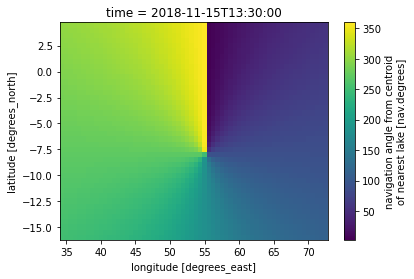

In [58]:
ds["dir_from_centroid"][50].plot()